In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import optimize
from sympy import *
from scipy.io import loadmat
import scipy.optimize as op
from sklearn.preprocessing import OneHotEncoder
from collections import namedtuple
%matplotlib inline

# 1. Multi-Class Classification

In [6]:
data = loadmat("ex3data1.mat")

In [7]:
X = data['X']
y = data['y']

## 1.2 Visualize The Data

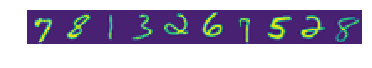

In [8]:
samples = np.random.choice(X.shape[0], 10)
plt.imshow(X[samples,:].reshape(-1,20).transpose())
plt.axis('off');

## 1.3 Vectorizing Regularized Logistic Regression

In [9]:
def sigmoid(z):
    return float(1) / (1 + np.exp(-z))

In [10]:
def vectorizedCostFunction(theta, X, y, gama):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    m, n = X.shape
    regArg = (float(gama) / (2*m)) * np.sum(np.square(theta[:, 1:]))
    firstArg = np.multiply(-y, np.log(sigmoid(X * theta.transpose())))
    secondArg = np.multiply(1-y, np.log(1 - sigmoid(X*theta.transpose())))
    return ((float(1)/m)*np.sum(firstArg-secondArg)) + regArg

In [11]:
def vectorizedGradient(theta, X, y, gama):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    m, n = X.shape
    regArg = (float(gama)/m) * np.c_[0, theta[:, 1:]]
    beta = sigmoid(X * theta.transpose()) - y
    grad = (float(1) / m)*X.transpose()*beta
    return grad + regArg.transpose()

## 1.4 OneVsAll Classification

In [12]:
def oneVsAllClassification(X, y, gama):
    numOfClasses = len(np.unique(y))
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    m, n = X.shape
    model = np.zeros(shape=(numOfClasses, n))
    
    for number in range(1, numOfClasses + 1): # 0 == 10 in this data set, so iterating between 1 to 10
        currY = np.array([1 if yRow == number else 0 for yRow in y])
        currY = np.reshape(currY, (-1, 1))
        theta = np.zeros(n)
        theta = op.minimize(fun=vectorizedCostFunction, x0=theta, args=(X, currY, gama), 
                            jac=vectorizedGradient, method="TNC")
        model[number-1, :] = theta.x
    return model

In [13]:
model = oneVsAllClassification(X, y, 1)

### 1.4.1 One Vs All Prediction

In [14]:
def oneVsAllPrediction(X, model):
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    X = np.matrix(X)
    model = np.matrix(model)
    costPrediction = sigmoid(X * model.transpose())
    maxPred = np.argmax(costPrediction, axis=1)
    return maxPred + 1

In [15]:
myPrediction = oneVsAllPrediction(X, model)

### Accuracy!!!

In [16]:
print(f"Accuracy = {(np.sum(myPrediction == y) / float(len(y)))*100}%")

Accuracy = 94.46%


# 2. Neural Networks

In [17]:
weights = loadmat("ex3weights.mat")
data = loadmat("ex3data1.mat")

In [18]:
theta1 = weights['Theta1']
theta2 = weights['Theta2']

X = data['X']
y = data['y']

In [19]:
X.shape, theta1.shape, theta2.shape

((5000, 400), (25, 401), (10, 26))

## 2.2 Feedforward Propagation And Prediction

In [20]:
def feedforwardPropagtionPredict(X, thetaPhase1, thetaPhase2):
    a1 = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    z2 = np.dot(a1, theta1.transpose())
    a2 = np.insert(sigmoid(z2), 0, np.ones(z2.shape[0]), axis=1)
    z3 = np.dot(a2, theta2.transpose())
    a3 = sigmoid(z3)
    
    return np.argmax(a3, axis=1) + 1
    

In [21]:
myPrediction = feedforwardPropagtionPredict(X, theta1, theta2)

In [22]:
print(f"Accuracy = {(np.sum(myPrediction == y.ravel()) / float(len(y)))*100}%")

Accuracy = 97.52%


# 3. With sklearn!

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
model = MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(20, ), alpha=1e-5)
model.fit(X, y.ravel())

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
myPrediction = model.predict(X)
print(f"Accuracy = {(np.sum(myPrediction == y.ravel()) / float(len(y)))*100}%")

Accuracy = 99.96000000000001%
